In [1]:
import pandas as pd

train_terms = pd.read_csv("/Users/devshah/Documents/WorkSpace/University/year 3/CSC413_project/CAFA 5 Protein Function Prediction/Train/train_terms.tsv",sep="\t")
print(train_terms.shape)

(5363863, 3)


In [2]:
train_terms.head()

,EntryID,term,aspect
0,A0A009IHW8,GO:0008152,BPO
1,A0A009IHW8,GO:0034655,BPO
2,A0A009IHW8,GO:0072523,BPO
3,A0A009IHW8,GO:0044270,BPO
4,A0A009IHW8,GO:0006753,BPO


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

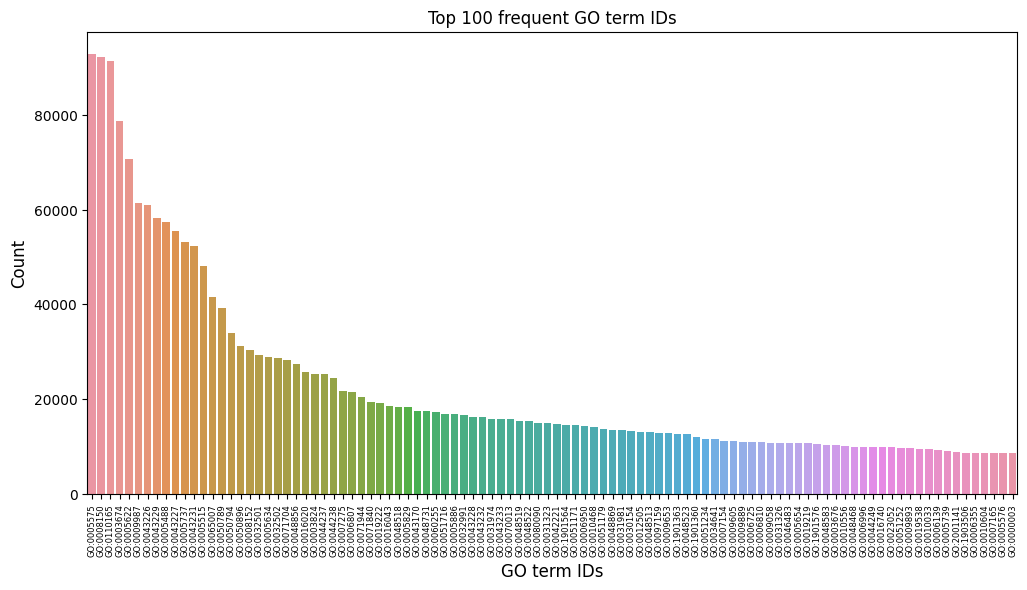

In [4]:
plot_df = train_terms['term'].value_counts().iloc[:100]

figure, axis = plt.subplots(1, 1, figsize=(12, 6))

bp = sns.barplot(ax=axis, x=np.array(plot_df.index), y=plot_df.values)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 6)
axis.set_title('Top 100 frequent GO term IDs')
bp.set_xlabel("GO term IDs", fontsize = 12)
bp.set_ylabel("Count", fontsize = 12)
plt.show()

In [7]:
Train_terms = pd.read_csv("/Users/devshah/Documents/WorkSpace/University/year 3/CSC413_project/CAFA 5 Protein Function Prediction/Train/train_terms.tsv",sep="\t")
Train_tax = pd.read_csv("/Users/devshah/Documents/WorkSpace/University/year 3/CSC413_project/CAFA 5 Protein Function Prediction/Train/train_taxonomy.tsv", sep="\t")

In [18]:
df = pd.merge(Train_terms, Train_tax, on=["EntryID"])

df.head()

,EntryID,term,aspect,taxonomyID
0,A0A009IHW8,GO:0008152,BPO,1310613
1,A0A009IHW8,GO:0034655,BPO,1310613
2,A0A009IHW8,GO:0072523,BPO,1310613
3,A0A009IHW8,GO:0044270,BPO,1310613
4,A0A009IHW8,GO:0006753,BPO,1310613


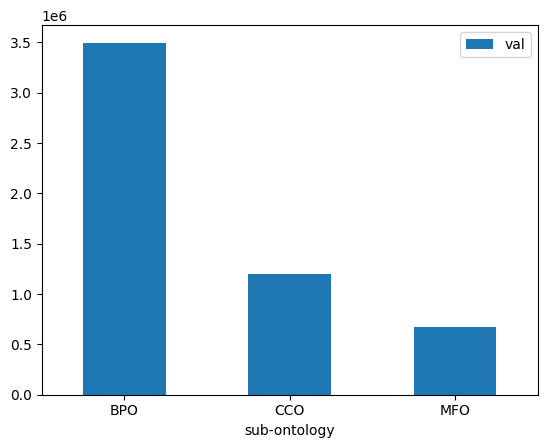

In [19]:
t_df = pd.DataFrame({'sub-ontology':['BPO', 'CCO', 'MFO'], 'val':[3497732, 1196017, 670114]})
ax = t_df.plot.bar(x='sub-ontology', y='val', rot=0)

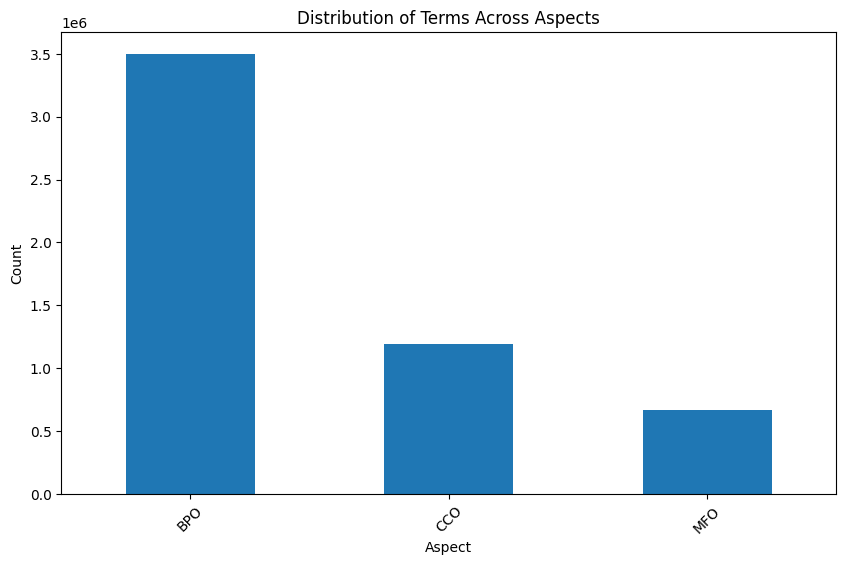

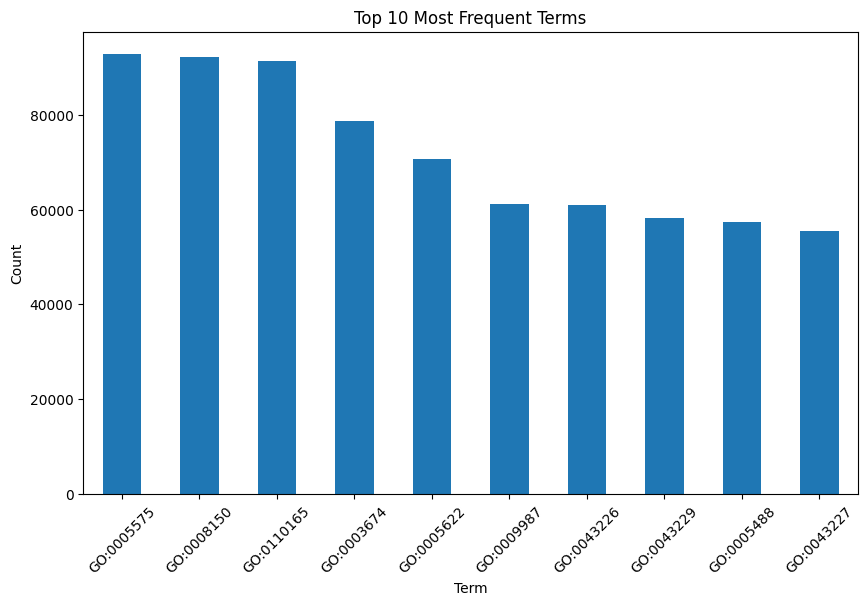

In [21]:
# Explore the distribution of terms across different aspects
aspect_distribution = df['aspect'].value_counts()
plt.figure(figsize=(10, 6))
aspect_distribution.plot(kind='bar')
plt.title('Distribution of Terms Across Aspects')
plt.xlabel('Aspect')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Analyze the top 10 most frequent terms across all aspects
top_terms = df['term'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_terms.plot(kind='bar')
plt.title('Top 10 Most Frequent Terms')
plt.xlabel('Term')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()




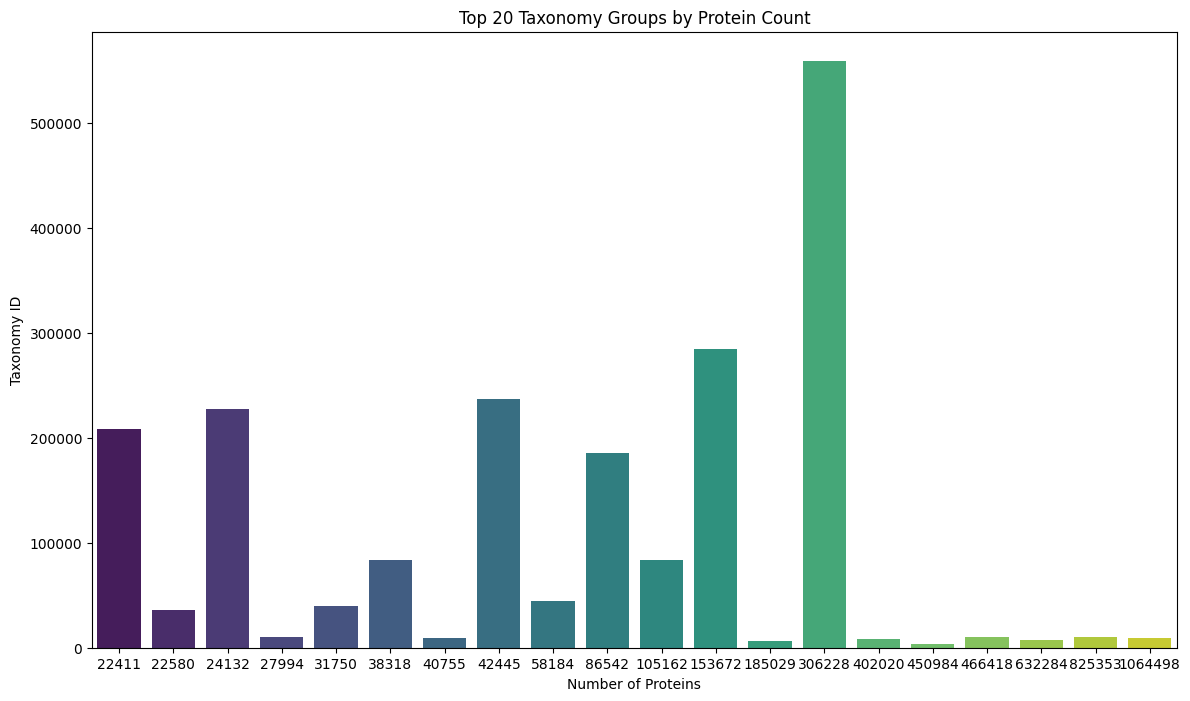

In [22]:
# Count of each taxonomyID
taxonomy_counts = df['taxonomyID'].value_counts().reset_index()
taxonomy_counts.columns = ['TaxonomyID', 'Count']

# Display top 20 taxonomyIDs
top_n = 20
top_taxonomies = taxonomy_counts.head(top_n)

# Plotting
plt.figure(figsize=(14,8))
sns.barplot(data=top_taxonomies, x='Count', y='TaxonomyID', palette='viridis')
plt.title(f'Top {top_n} Taxonomy Groups by Protein Count')
plt.xlabel('Number of Proteins')
plt.ylabel('Taxonomy ID')
plt.show()


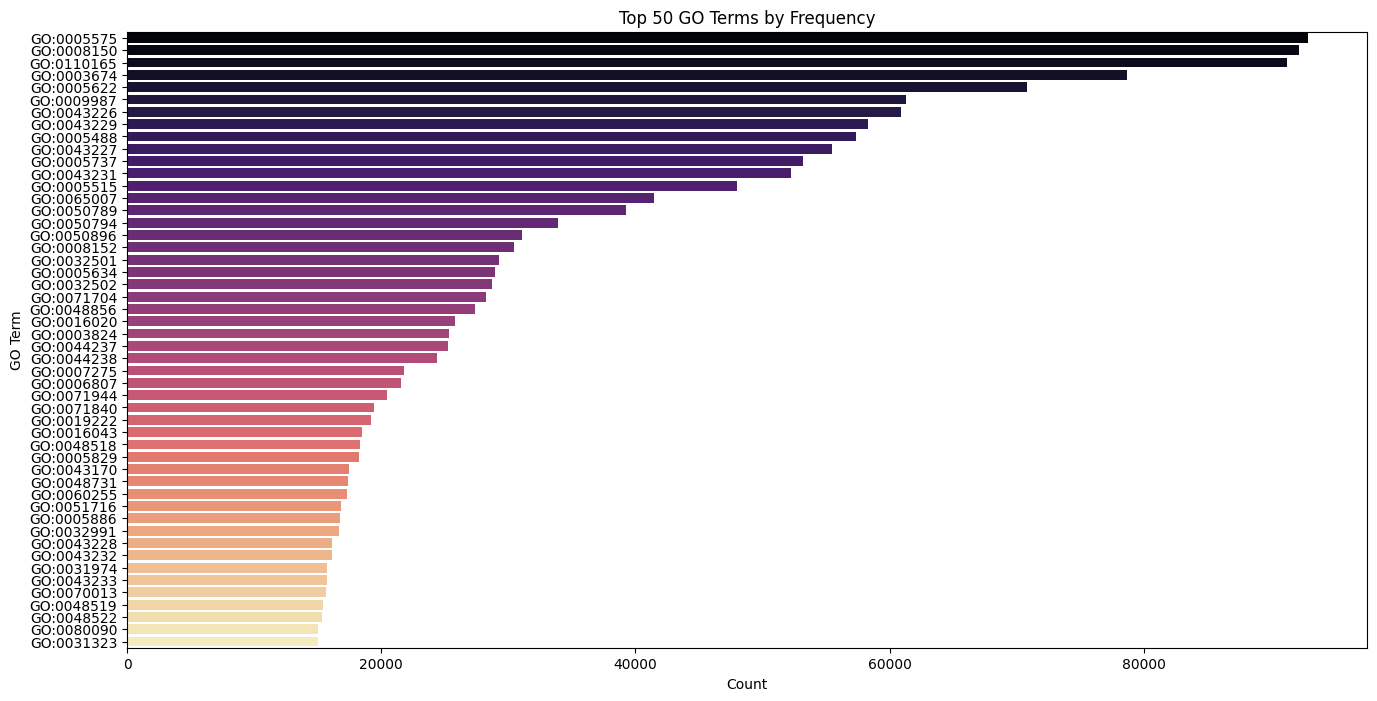

In [24]:
# Top 50 GO terms
top_go_terms = df['term'].value_counts().head(50)

# Plotting
plt.figure(figsize=(16,8))
sns.barplot(x=top_go_terms.values, y=top_go_terms.index, palette='magma')
plt.title('Top 50 GO Terms by Frequency')
plt.xlabel('Count')
plt.ylabel('GO Term')
plt.show()


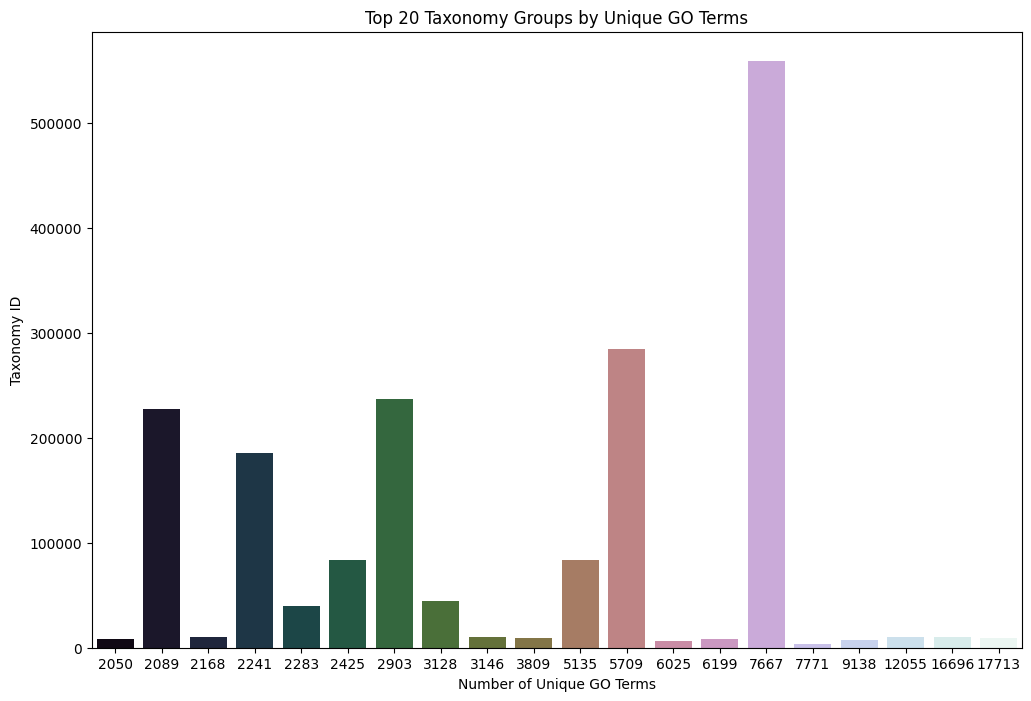

In [25]:
# Merge taxonomyID with a possible taxonomy name (if available)
# Assuming you have a mapping of taxonomyID to taxonomy names, otherwise proceed with IDs

# Number of unique GO terms per taxonomyID
taxonomy_go = df.groupby('taxonomyID')['term'].nunique().reset_index()
taxonomy_go.rename(columns={'term': 'Unique_GO_Terms'}, inplace=True)

# Plotting top 20 taxonomyIDs by Unique_GO_Terms
plt.figure(figsize=(12,8))
sns.barplot(data=taxonomy_go.sort_values('Unique_GO_Terms', ascending=False).head(20),
            x='Unique_GO_Terms', y='taxonomyID', palette='cubehelix')
plt.title('Top 20 Taxonomy Groups by Unique GO Terms')
plt.xlabel('Number of Unique GO Terms')
plt.ylabel('Taxonomy ID')
plt.show()


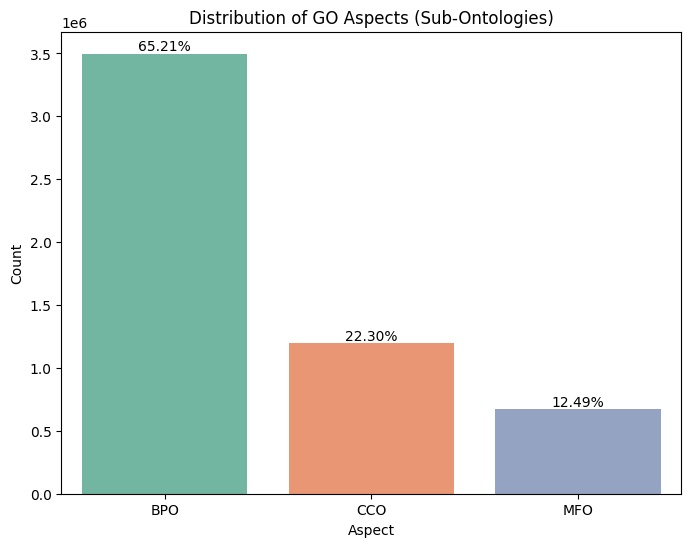

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of each aspect (sub-ontology)
aspect_counts = df['aspect'].value_counts().reset_index()
aspect_counts.columns = ['Aspect', 'Count']

# Calculate percentages
aspect_counts['Percentage'] = (aspect_counts['Count'] / aspect_counts['Count'].sum()) * 100

# Plotting
plt.figure(figsize=(8,6))
sns.barplot(data=aspect_counts, x='Aspect', y='Count', palette='Set2')

# Add percentage annotations
for index, row in aspect_counts.iterrows():
    plt.text(index, row.Count, f"{row.Percentage:.2f}%", color='black', ha="center", va='bottom')

plt.title('Distribution of GO Aspects (Sub-Ontologies)')
plt.xlabel('Aspect')
plt.ylabel('Count')
plt.show()


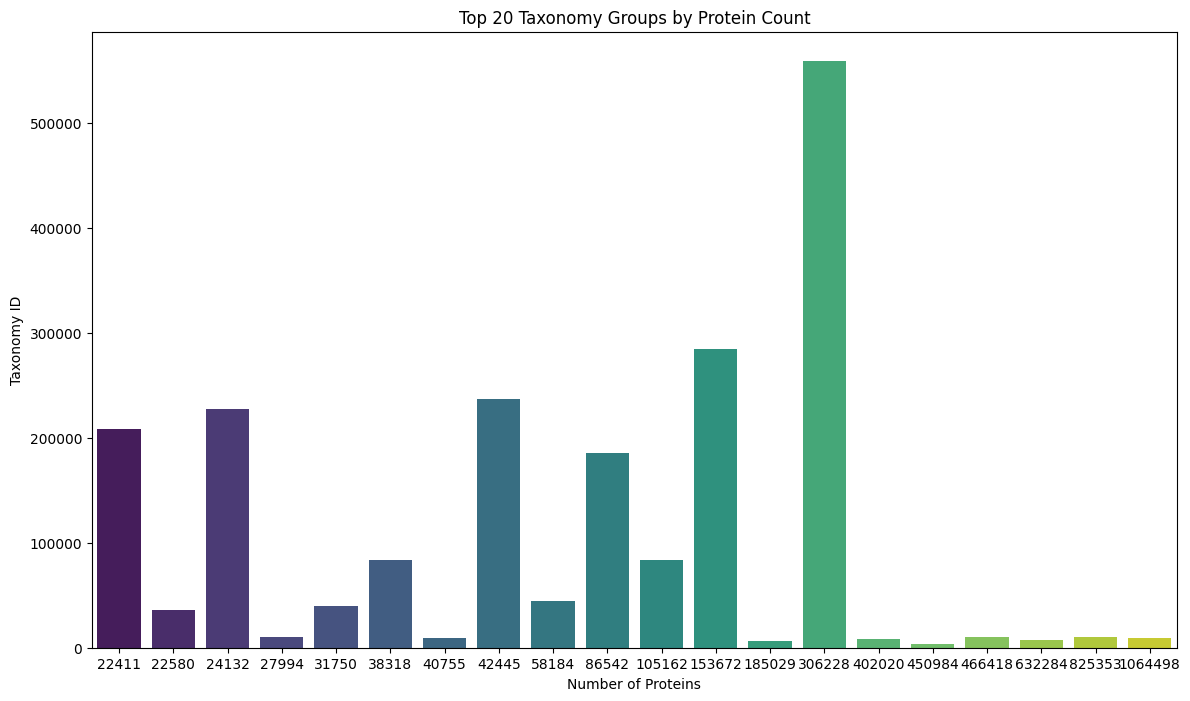

In [27]:
# Count of each taxonomyID
taxonomy_counts = df['taxonomyID'].value_counts().reset_index()
taxonomy_counts.columns = ['TaxonomyID', 'Count']

# Display top 20 taxonomyIDs
top_n = 20
top_taxonomies = taxonomy_counts.head(top_n)

# Plotting
plt.figure(figsize=(14,8))
sns.barplot(data=top_taxonomies, x='Count', y='TaxonomyID', palette='viridis')
plt.title(f'Top {top_n} Taxonomy Groups by Protein Count')
plt.xlabel('Number of Proteins')
plt.ylabel('Taxonomy ID')
plt.show()


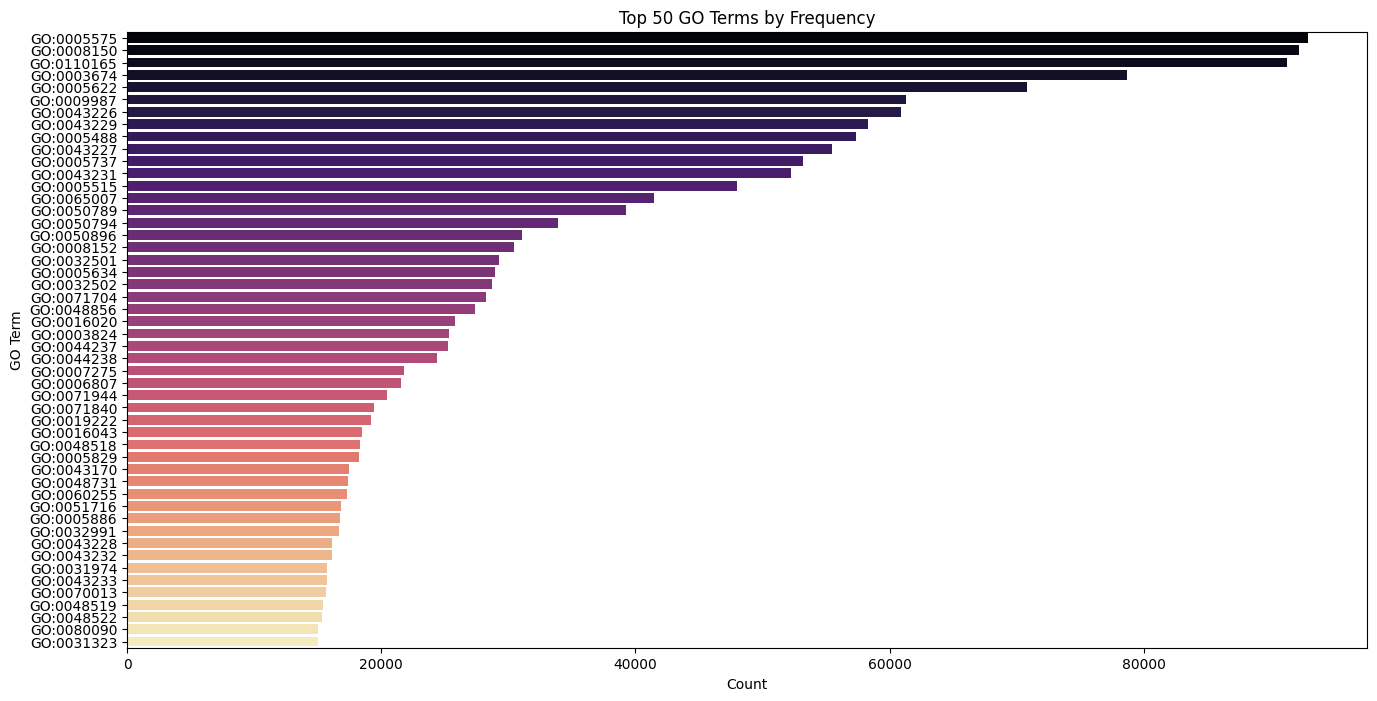

In [29]:
# Top 50 GO terms by frequency
top_go_terms = df['term'].value_counts().head(50)

# Plotting
plt.figure(figsize=(16,8))
sns.barplot(x=top_go_terms.values, y=top_go_terms.index, palette='magma')
plt.title('Top 50 GO Terms by Frequency')
plt.xlabel('Count')
plt.ylabel('GO Term')
plt.show()
